In [1]:
#install.packages("readtext")
suppressWarnings(library(readtext))

In [2]:
train_data_dir <- system.file("src/text_classfication/C50train/")

In [3]:
train_data <- readtext(paste0(train_data_dir, "src/text_classfication/C50train/*"), dvsep = "\n")

In [4]:
test_data_dir <- system.file("src/text_classfication/C50test/")

In [5]:
test_data <- readtext(paste0(test_data_dir, "src/text_classfication/C50test/*"), dvsep = "\n")

In [6]:
authors <- as.data.frame(rep(basename(list.dirs("src/text_classfication/C50train")), each = 50))

In [7]:
authors_name <- authors[-(1:50),]

In [8]:
train_data$authors <- authors_name
test_data$authors <- authors_name

In [9]:
train_data$doc_id <- NULL
test_data$doc_id <- NULL

In [10]:
train_data$authors <- as.factor(train_data$authors)
test_data$authors <- as.factor(test_data$authors)

In [11]:
suppressWarnings(library(dplyr))
suppressWarnings(library(data.table))


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last



In [12]:
AaronTrain <- train_data %>% filter(authors == "AaronPressman", text == text)
JaneTrain <- train_data %>% filter(authors == "JaneMacartney", text == text)
SarahTrain <- train_data %>% filter(authors == "SarahDavison", text == text)
WilliamTrain <- train_data %>% filter(authors == "WilliamKazer", text == text)
train_data <- rbind(AaronTrain, JaneTrain, SarahTrain, WilliamTrain)

In [13]:
AaronTest <- test_data %>% filter(authors == "AaronPressman", text == text)
JaneTest <- test_data %>% filter(authors == "JaneMacartney", text == text)
SarahTest <- test_data %>% filter(authors == "SarahDavison", text == text)
WilliamTest <- test_data %>% filter(authors == "WilliamKazer", text == text)
test_data <- rbind(AaronTest, JaneTest, SarahTest, WilliamTest)

In [14]:
dim(test_data)

[1] 200   2

In [15]:
dim(train_data)

[1] 200   2

In [16]:
install.packages("tm")
library(tm)

package 'tm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alpye\AppData\Local\Temp\Rtmp8EhfIa\downloaded_packages


Warning message:
"package 'tm' was built under R version 3.6.3"Loading required package: NLP
Warning message:
"package 'NLP' was built under R version 3.6.3"

In [17]:
train_data_corpus <- Corpus(VectorSource(train_data$text))
test_data_corpus <- Corpus(VectorSource(test_data$text))

In [18]:
train_data_corpus_clean <- tm_map(train_data_corpus, tolower)
test_data_corpus_clean <- tm_map(test_data_corpus, tolower)

train_data_corpus_clean <- tm_map(train_data_corpus_clean, removeNumbers)
test_data_corpus_clean <- tm_map(test_data_corpus_clean, removeNumbers)

train_data_corpus_clean <- tm_map(train_data_corpus_clean, removeWords, stopwords())
test_data_corpus_clean <- tm_map(test_data_corpus_clean, removeWords, stopwords())

train_data_corpus_clean <- tm_map(train_data_corpus_clean, removePunctuation)
test_data_corpus_clean <- tm_map(test_data_corpus_clean, removePunctuation)

train_data_corpus_clean <- tm_map(train_data_corpus_clean, stripWhitespace)
test_data_corpus_clean <- tm_map(test_data_corpus_clean, stripWhitespace)

Warning message in tm_map.SimpleCorpus(train_data_corpus, tolower):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(test_data_corpus, tolower):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(train_data_corpus_clean, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(test_data_corpus_clean, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(train_data_corpus_clean, removeWords, stopwords()):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(test_data_corpus_clean, removeWords, stopwords()):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(train_data_corpus_clean, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(test_data_corpus_clean, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(train_data_corpus_clean, stripWhitespace):
"transformation drop

In [19]:
suppressWarnings(inspect(train_data_corpus_clean[1]))

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1

[1]  internet may overflowing new technology crime cyberspace still oldfashioned variety national consumers league said wednesday popular scam internet pyramid scheme early investors bogus fund paid deposits later investors league nonprofit consumer advocacy group tracks web scams site set world wide web february called internet fraud watch httpwwwfraudorg site collects reports directly consumers widely praised law enforcement agencies consumers suspect scam internet critical information said jodie bernstein director federal trade commissions bureau consumer protection internet fraud watch major help ftc identifying particular scams infancy may example commission used internet reports shut site run fortuna alliance taken million promising investors earn month initial deposit instead fortuna kept money commission charged fraud reports leagues site visited times forwarded local state feder

In [20]:
install.packages("wordcloud")
library(wordcloud)

package 'wordcloud' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alpye\AppData\Local\Temp\Rtmp8EhfIa\downloaded_packages


Warning message:
"package 'wordcloud' was built under R version 3.6.3"Loading required package: RColorBrewer


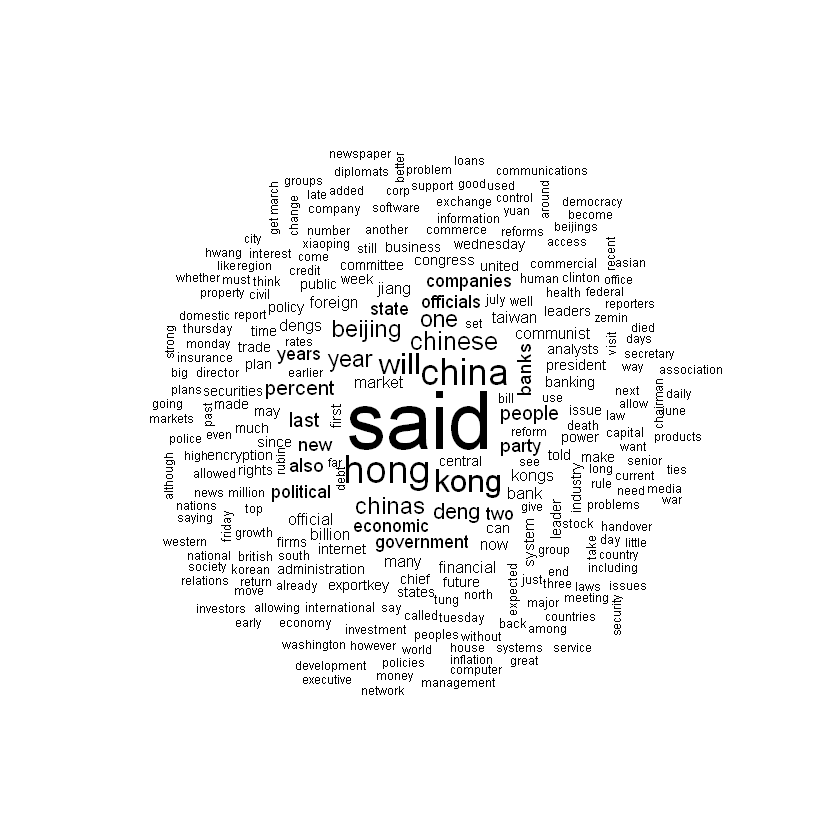

In [21]:
wordcloud(test_data_corpus_clean, min.freq = 40, random.order = FALSE)

In [22]:
train_dtm <- DocumentTermMatrix(train_data_corpus_clean)
test_dtm <- DocumentTermMatrix(test_data_corpus_clean)

In [23]:
inspect(test_dtm)

<<DocumentTermMatrix (documents: 200, terms: 9103)>>
Non-/sparse entries: 42532/1778068
Sparsity           : 98%
Maximal term length: 22
Weighting          : term frequency (tf)
Sample             :
     Terms
Docs  beijing china chinas chinese hong kong one said will year
  102       1     7      3       0   24   18   5   10    3    3
  104       0     0      0       0    3    3   2   25    8    1
  122       0     9      1       9   18   14   6    6    2    1
  128       0     5      1       4   21   18   1    3    3    0
  148       0     7      2       2   27   20   1    2    3    0
  150       0     4      3       1   16   13   2    7    4    0
  181      16     9      5       2   17   13   2    8    3    0
  3         0     0      0       0    0    0   4    9    2    0
  84        0     2      3       5    0    0   0    2    0    2
  90        3     8      6       5    2    2   2   10    1    3


In [24]:
FreqWords <- findFreqTerms(train_dtm, 5)

In [25]:
dict <- function(x) {
    if(is.character(x)) {
        return (x)
    }
    stop("x is not a character vector")
}

In [26]:
data_dict <- dict(findFreqTerms(train_dtm, 5))

In [27]:
train <- DocumentTermMatrix(train_data_corpus_clean, list(data_dict))
test <- DocumentTermMatrix(test_data_corpus_clean, list(data_dict))

In [28]:
convert_counts <- function(x) {
        x <- ifelse(x > 0, 1, 0)
        x <- factor(x, levels = c(0, 1), labels = c("No", "Yes")) 
        return(x)
}

In [29]:
train <- apply(train, MARGIN = 2, convert_counts)
test <- apply(test, MARGIN = 2, convert_counts)

In [30]:
library(e1071)

Warning message:
"package 'e1071' was built under R version 3.6.3"

In [31]:
model <- naiveBayes(train, train_data$authors)

In [32]:
install.packages("gmodels")

package 'gmodels' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alpye\AppData\Local\Temp\Rtmp8EhfIa\downloaded_packages


In [33]:
library(gmodels)

Warning message:
"package 'gmodels' was built under R version 3.6.3"

In [34]:
pred <- predict(model, test)

In [35]:
CrossTable(pred, test_data$authors,
           prop.chisq = FALSE, prop.t = FALSE,
           dnn = c('predicted', 'actual'))


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|-------------------------|

 
Total Observations in Table:  200 

 
              | actual 
    predicted | AaronPressman | JaneMacartney |  SarahDavison |  WilliamKazer |     Row Total | 
--------------|---------------|---------------|---------------|---------------|---------------|
AaronPressman |            46 |             0 |             0 |             0 |            46 | 
              |         1.000 |         0.000 |         0.000 |         0.000 |         0.230 | 
              |         0.920 |         0.000 |         0.000 |         0.000 |               | 
--------------|---------------|---------------|---------------|---------------|---------------|
JaneMacartney |             0 |            40 |             2 |            14 |            56 | 
              |         0.000 |         0.714 |         0.036 |         0.250 |         0.280 | 
 